# Crea una rosa de viento
* Para todo el año
* Para el día y la noche de todo el año
* [WindRose](https://github.com/python-windrose/windrose)


In [15]:
# # revisar requirements de la p'agina de github
# pip  install pandas
# pip install numpy
# pip install matplotlib
# pip install numpy
# %pip install windrose

In [52]:
import pandas as pd
from windrose import WindroseAxes
from windrose import WindAxes

import numpy as np
import calendar

In [21]:
file = '../data/001_raw/temixco.csv'
tmx  = pd.read_csv(file,index_col=0,parse_dates=True,usecols=[0,5,6])


In [22]:
tmx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WS      52560 non-null  float64
 1   WD      52560 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB


In [23]:
tmx.dtypes

WS    float64
WD    float64
dtype: object

In [24]:
tmx.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
               '2018-12-31 22:20:00', '2018-12-31 22:30:00',
               '2018-12-31 22:40:00', '2018-12-31 22:50:00',
               '2018-12-31 23:00:00', '2018-12-31 23:10:00',
               '2018-12-31 23:20:00', '2018-12-31 23:30:00',
               '2018-12-31 23:40:00', '2018-12-31 23:50:00'],
              dtype='datetime64[ns]', name='time', length=52560, freq=None)

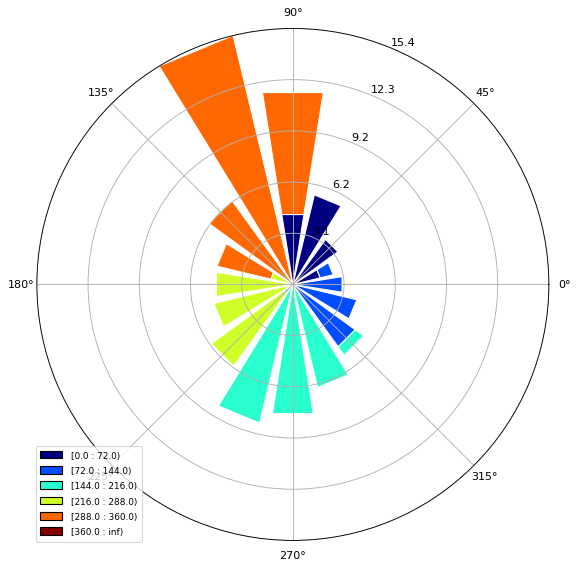

In [25]:
ax = WindroseAxes.from_ax()
ax.bar(tmx.WD, tmx.WD, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


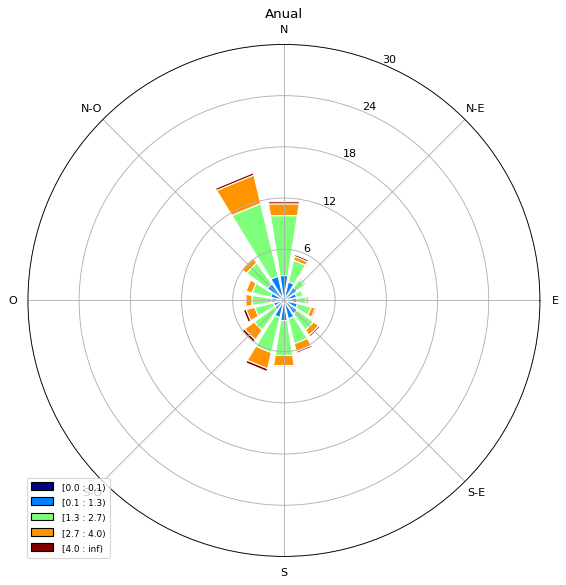

In [33]:
ax = WindroseAxes.from_ax(rmax=30,theta_labels=["E", "N-E", "N", "N-O", "O", "S-O", "S", "S-E"])
ax.set_title('Anual')
rangos = [0., 0.1,1.34,2.67,4]

ax.bar(tmx.WD,tmx.WS, bins= rangos,normed=True, opening=.8, edgecolor='white')
ax.set_legend()


In [34]:
noche = pd.concat([tmx.between_time('0:00:00','7:59:59'),tmx.between_time('20:00:01','23:59:59')],axis=0)
dia   = pd.concat([tmx.between_time('8:00:00','20:00:00')],axis=0)


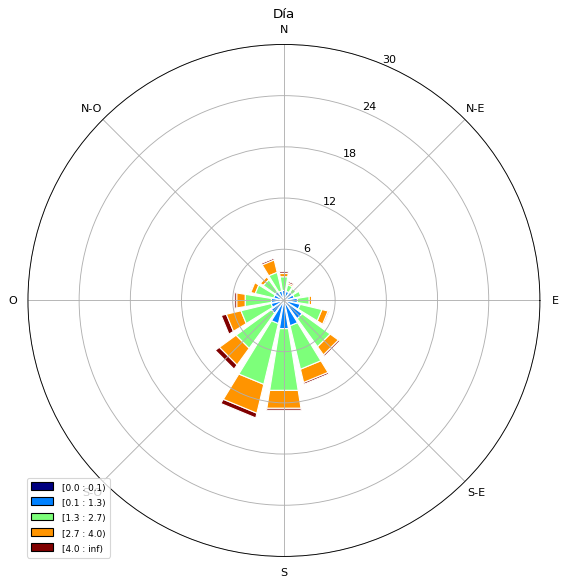

In [36]:
ax = WindroseAxes.from_ax(rmax=30,theta_labels=["E", "N-E", "N", "N-O", "O", "S-O", "S", "S-E"])
ax.set_title('Día')
ax.bar(dia.WD, dia.WS, bins= rangos,normed=True, opening=.8, edgecolor='white')
ax.set_legend()

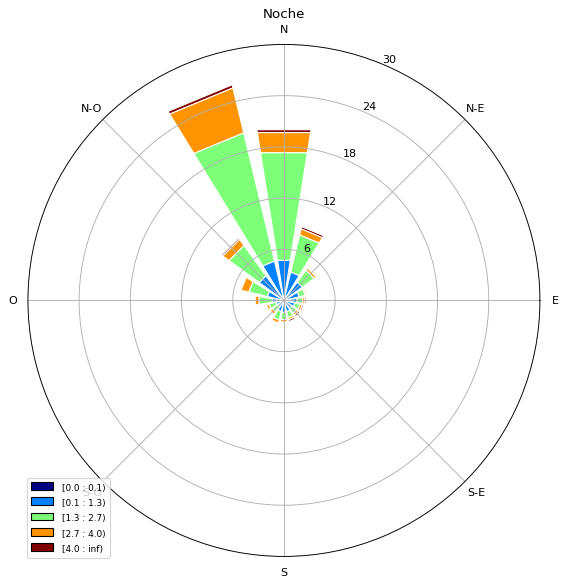

In [37]:
ax = WindroseAxes.from_ax(rmax=30,theta_labels=["E", "N-E", "N", "N-O", "O", "S-O", "S", "S-E"])
ax.set_title('Noche')
ax.bar(noche.WD, noche.WS, bins= rangos,normed=True, opening=.8, edgecolor='white')
ax.set_legend()


In [47]:
meses = calendar.month_name[1:]
meses

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

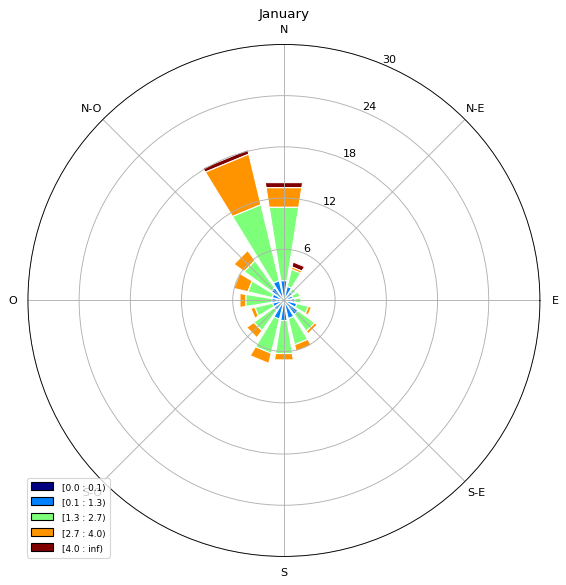

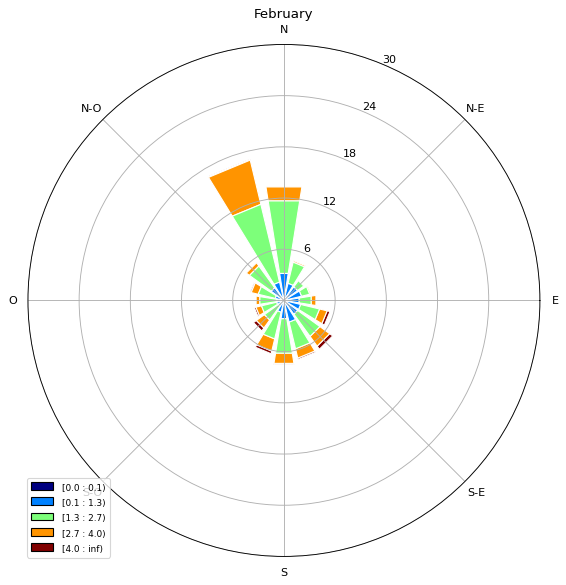

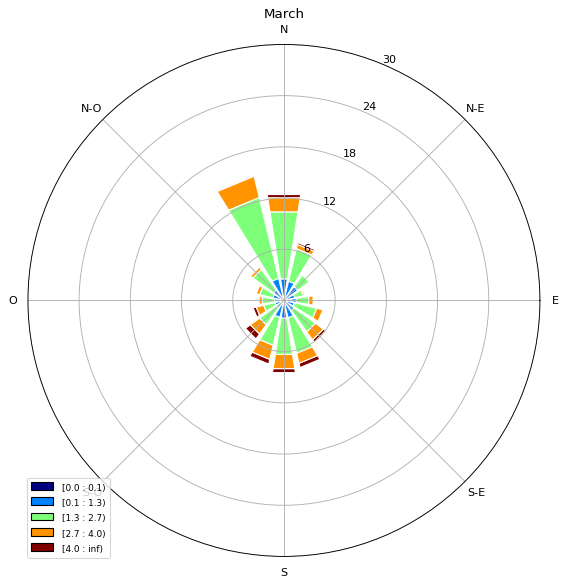

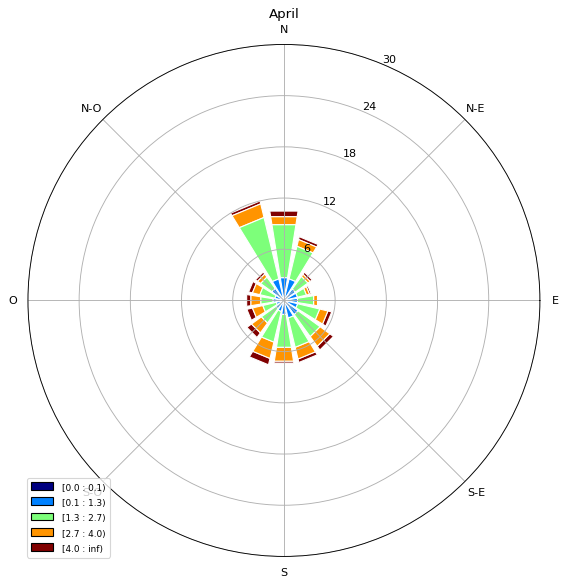

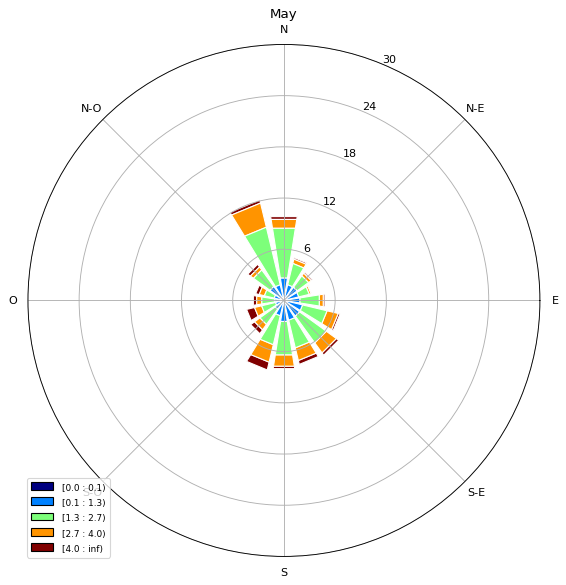

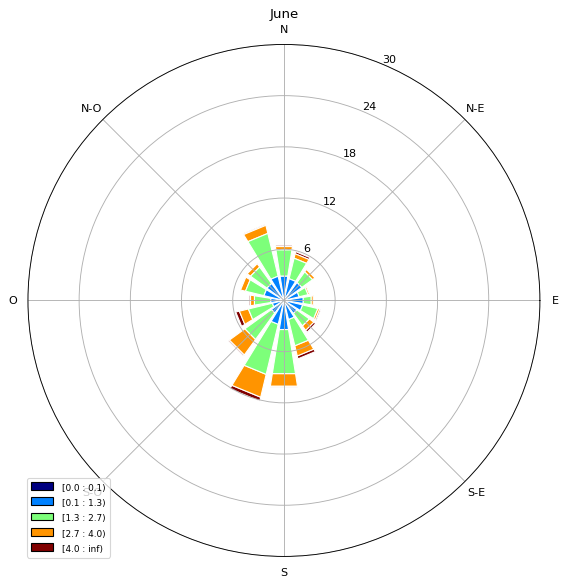

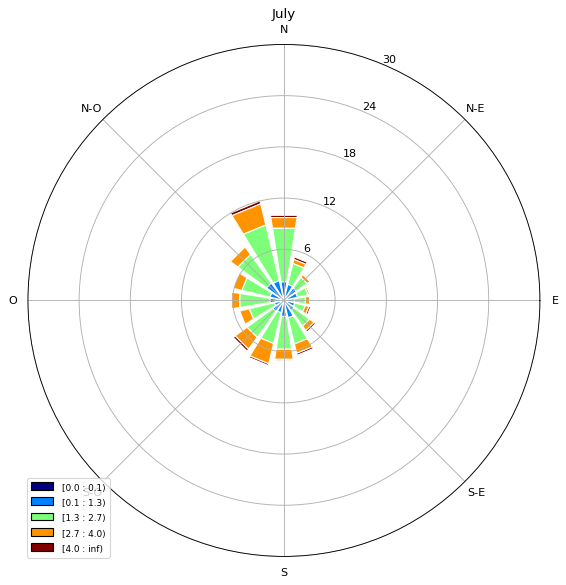

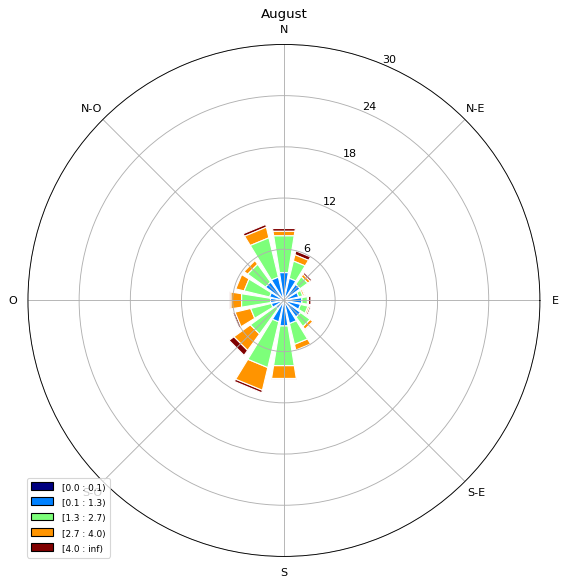

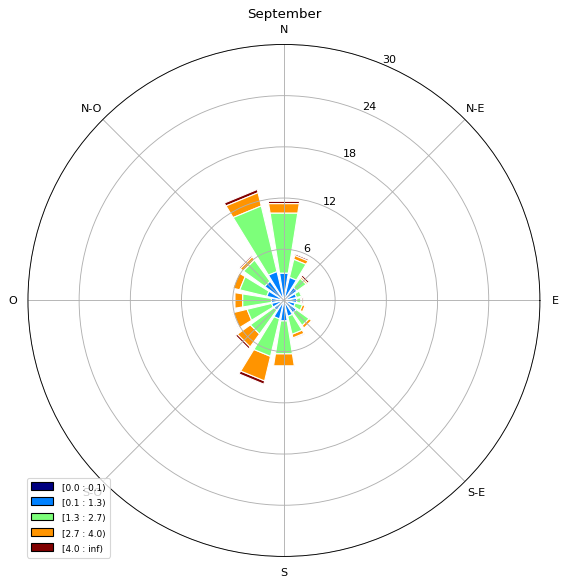

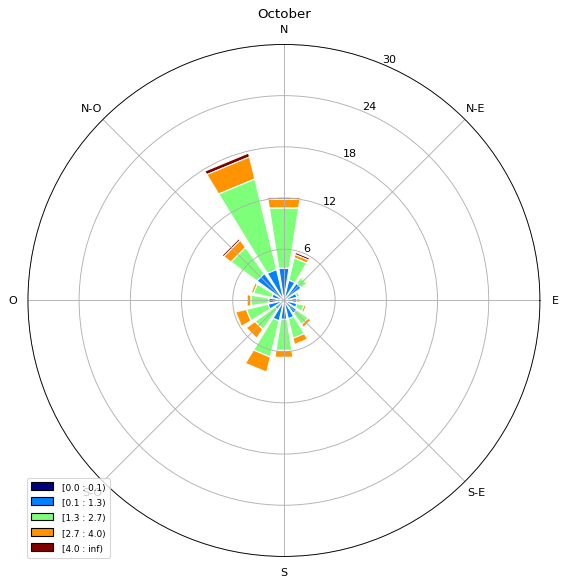

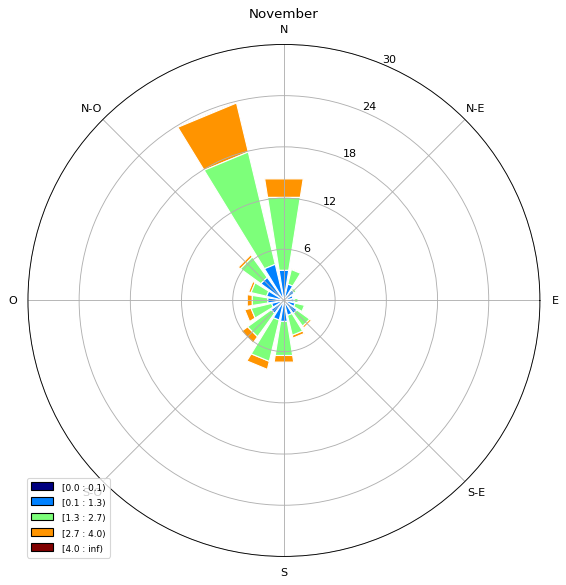

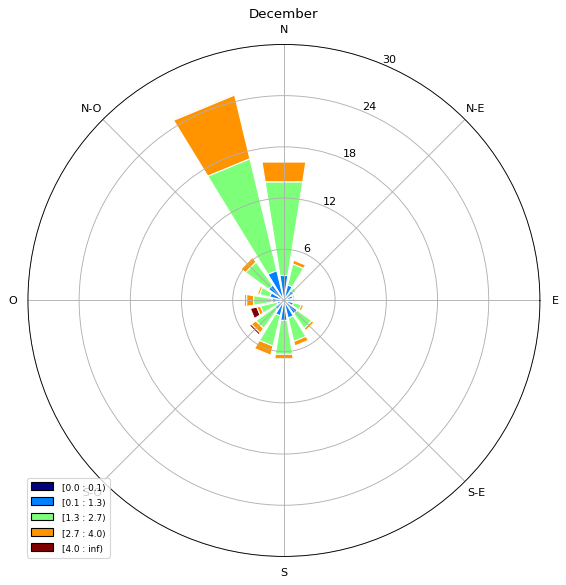

In [49]:
meses = calendar.month_name[1:]
# meses

for mes in meses:
    ax = WindroseAxes.from_ax(rmax=30,theta_labels=["E", "N-E", "N", "N-O", "O", "S-O", "S", "S-E"])
    ax.set_title(mes)
    ax.bar(tmx[tmx.index.month_name()==mes].WD,tmx[tmx.index.month_name()==mes].WS, bins= rangos,normed=True, opening=.8, edgecolor='white')
    ax.set_legend()


/usr/local/lib/python3.9/site-packages/windrose/windrose.py:694: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(var, bins=bins, normed=True)


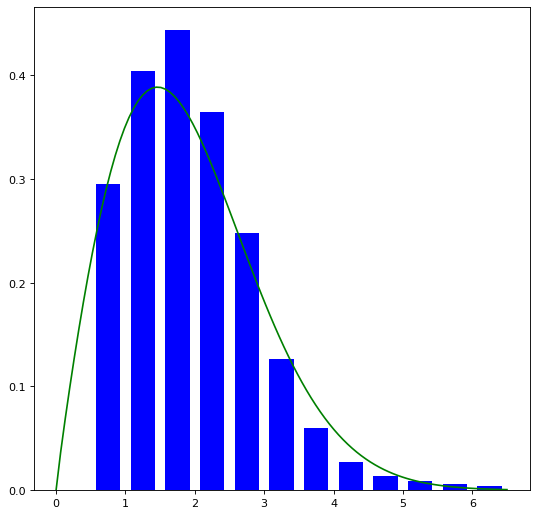

In [55]:
# from windrose import WindAxes
ax = WindAxes.from_ax()
bins = np.arange(0, 6 + 1, 0.5)
bins = bins[1:]
ax, params = ax.pdf(tmx.WS, bins=bins)


array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5])